In [1]:
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install catboost


In [3]:
!pip install xgboost


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# print(stopwords.words('english')) printing the stopwords in english

**Data Preprocessing**


In [5]:
# loading the dataset to a pandas Dataframe

viva_dataset = pd.read_excel('Audio_data_final_notcleaned.xlsx')

In [6]:
viva_dataset.shape

(1008, 3)

In [7]:
viva_dataset.head()

,Question,Answer,Strength
0,In what scenario should I use mean and where s...,Mean is used to calculate the average.,-1
1,What is covariance and what is correlation?,Correlation measures the strength and directio...,1
2,What does a correlation of 0 versus a correlat...,The respondent did not provide an explanation ...,-1
3,Can you name 1 classifier which is probabilist...,Naive Bayes is a probabilistic classifier.,1
4,How would you go about designing a speech reco...,"Collect a dataset, extract features, and selec...",0


In [14]:
label_mapping = {1: 2, 0: 1, -1: 0}

# Map original 'Strength' values to new labels
viva_dataset['UpdateStrength'] = viva_dataset['Strength'].map(label_mapping)

# Display the updated dataset
print(viva_dataset.head())

                                            Question  \
0  In what scenario should I use mean and where s...   
1        What is covariance and what is correlation?   
2  What does a correlation of 0 versus a correlat...   
3  Can you name 1 classifier which is probabilist...   
4  How would you go about designing a speech reco...   

                                              Answer  Strength  UpdateStrength  
0            Mean is used to calculate the average.         -1               0  
1  Correlation measures the strength and directio...         1               2  
2  The respondent did not provide an explanation ...        -1               0  
3         Naive Bayes is a probabilistic classifier.         1               2  
4  Collect a dataset, extract features, and selec...         0               1  


In [15]:
# counting the no. of missing values in dataset
viva_dataset.isnull().sum()


Question          0
Answer            0
Strength          0
UpdateStrength    0
dtype: int64

In [16]:
# Separating the data and labels
X = viva_dataset[['Question', 'Answer']]
Y = viva_dataset['UpdateStrength']

print("Features (X):")
print(X.head())

print("\nLabels (Y):")
print(Y.head())


Features (X):
                                            Question  \
0  In what scenario should I use mean and where s...   
1        What is covariance and what is correlation?   
2  What does a correlation of 0 versus a correlat...   
3  Can you name 1 classifier which is probabilist...   
4  How would you go about designing a speech reco...   

                                              Answer  
0            Mean is used to calculate the average.   
1  Correlation measures the strength and directio...  
2  The respondent did not provide an explanation ...  
3         Naive Bayes is a probabilistic classifier.  
4  Collect a dataset, extract features, and selec...  

Labels (Y):
0    0
1    2
2    0
3    2
4    1
Name: UpdateStrength, dtype: int64


In [17]:
print(X)
print(Y)

                                               Question  \
0     In what scenario should I use mean and where s...   
1           What is covariance and what is correlation?   
2     What does a correlation of 0 versus a correlat...   
3     Can you name 1 classifier which is probabilist...   
4     How would you go about designing a speech reco...   
...                                                 ...   
1003         What is the purpose of a confusion matrix?   
1004                 How do you interpret the F1 score?   
1005                          What is cross-validation?   
1006               Can you explain what a ROC curve is?   
1007   What is the importance of hyperparameter tuning?   

                                                 Answer  
0               Mean is used to calculate the average.   
1     Correlation measures the strength and directio...  
2     The respondent did not provide an explanation ...  
3            Naive Bayes is a probabilistic classifier.  
4

**Stremming Procedure**

In [23]:
# Combine 'Question' and 'Answer' columns into a single text field
X = viva_dataset['Question'] + " " + viva_dataset['Answer']

# Use TfidfVectorizer on the combined text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Labels
Y = viva_dataset['UpdateStrength']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Training and test data separated successfully!")

Training and test data separated successfully!


Training Accuracy: 55.71%
Test Accuracy: 38.61%


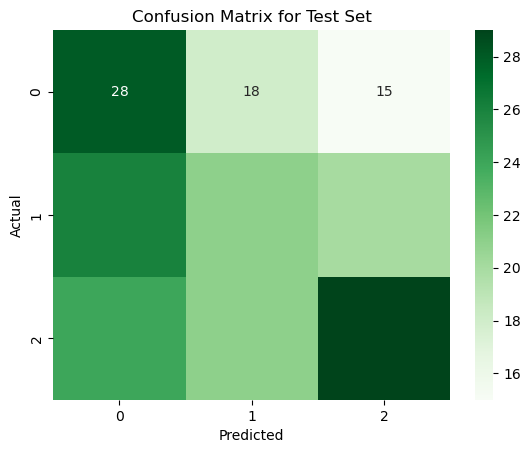

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, Y_train)

# Predicting on the training set
Y_train_pred = knn_model.predict(X_train)

# Predicting on the test set
Y_test_pred = knn_model.predict(X_test)

# Calculating accuracy for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Calculating accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

Best Hyperparameters: {'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}
Training Accuracy with Best Model: 44.67%
Test Accuracy with Best Model: 43.56%


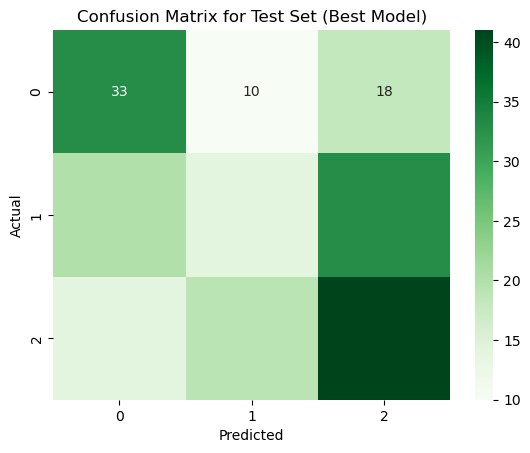

In [26]:
param_grid = {
    'n_neighbors': range(1, 31),      # Try different values of n_neighbors (1 to 30)
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'p': [1, 2]                        # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Predicting on the training set
Y_train_pred = best_knn_model.predict(X_train)

# Predicting on the test set
Y_test_pred = best_knn_model.predict(X_test)

# Calculating accuracy for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Training Accuracy with Best Model: {train_accuracy * 100:.2f}%')

# Calculating accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set (Best Model)')
plt.show()

Best Hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 27}
Training Accuracy with Best Model: 100.00%
Test Accuracy with Best Model: 43.07%


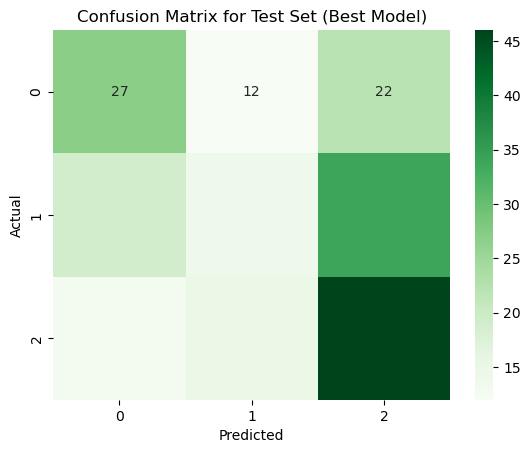

In [27]:
def knn_with_random_search(X_train, Y_train, X_test, Y_test):
    # Define hyperparameter distribution for RandomizedSearchCV
    param_dist = {
        'n_neighbors': range(1, 31),            # n_neighbors between 1 and 30
        'weights': ['uniform', 'distance'],     # Uniform or distance-based weighting
        'p': [1, 2]                             # Manhattan distance (p=1) or Euclidean distance (p=2)
    }

    # Create the KNN model
    knn_model = KNeighborsClassifier()

    # Set up RandomizedSearchCV with 5-fold cross-validation
    random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist,
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit RandomizedSearchCV on the training data
    random_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params = random_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

    # Get the best model from RandomizedSearchCV
    best_knn_model = random_search.best_estimator_

    # Predicting on the training set
    Y_train_pred = best_knn_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = best_knn_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy with Best Model: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set (Best Model)')
    plt.show()

# Example of usage:
knn_with_random_search(X_train, Y_train, X_test, Y_test)

Training Accuracy: 73.57%
Test Accuracy: 42.57%


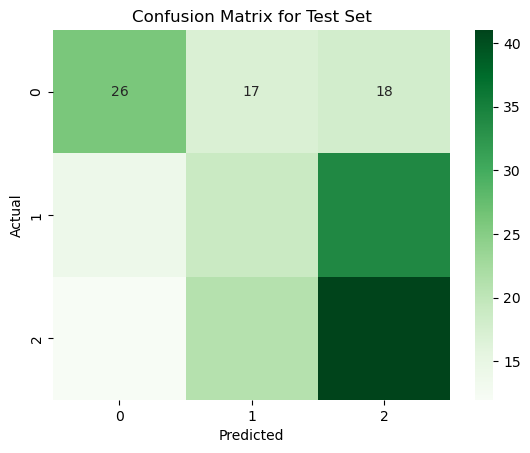

In [30]:
# def sigmoid(z):
#     """Compute the sigmoid function."""
#     # return 1 / (1 + np.exp(-z.toarray() if hasattr(z, 'toarray') else -z))
#     if isinstance(z, np.ndarray):  # If it's a dense array, directly apply np.exp
#         return 1 / (1 + np.exp(-z))
#     else:  # Convert sparse matrix to dense before applying np.exp
#         return 1 / (1 + np.exp(-z.toarray()))

# def fit(X, y, learning_rate=0.01, num_iterations=1000):
#     """Fit the logistic regression model."""
#     num_samples, num_features = X.shape
#     weights = np.zeros(num_features)
#     bias = 0

#     # Gradient descent
#     for _ in range(num_iterations):
#         linear_model = np.dot(X, weights) + bias
#         y_predicted = sigmoid(linear_model)

#         # Compute gradients
#         dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
#         db = (1 / num_samples) * np.sum(y_predicted - y)

#         # Update weights and bias
#         weights -= learning_rate * dw
#         bias -= learning_rate * db

#     return weights, bias

# def predict(X, weights, bias):
#     """Make predictions using the learned model."""
#     linear_model = np.dot(X, weights) + bias
#     y_predicted = sigmoid(linear_model)
#     predicted_classes = [1 if i > 0.5 else 0 for i in y_predicted]
#     return np.array(predicted_classes)

# def evaluate(X, y, weights, bias):
#     """Evaluate the model using accuracy."""
#     y_pred = predict(X, weights, bias)
#     return accuracy_score(y, y_pred)

def train_logistic_regression(X_train, Y_train):
    # Train a logistic regression model.
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    return model

def predict(model, X):
    # Make predictions using the trained logistic regression model.
    return model.predict(X)

def evaluate_accuracy(Y_true, Y_pred):
    # Evaluate and return the accuracy of the model.
    accuracy = accuracy_score(Y_true, Y_pred)
    return accuracy

def plot_confusion_matrix(Y_true, Y_pred):
    # Plot the confusion matrix as a heatmap.
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Train the model
log_reg_model = train_logistic_regression(X_train, Y_train)

# Make predictions
Y_train_pred = predict(log_reg_model, X_train)
Y_test_pred = predict(log_reg_model, X_test)

# Evaluate and print training accuracy
train_accuracy = evaluate_accuracy(Y_train, Y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate and print test accuracy
test_accuracy = evaluate_accuracy(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot confusion matrix for test set
plot_confusion_matrix(Y_test, Y_test_pred)

Training Accuracy: 72.58%
Test Accuracy: 40.10%


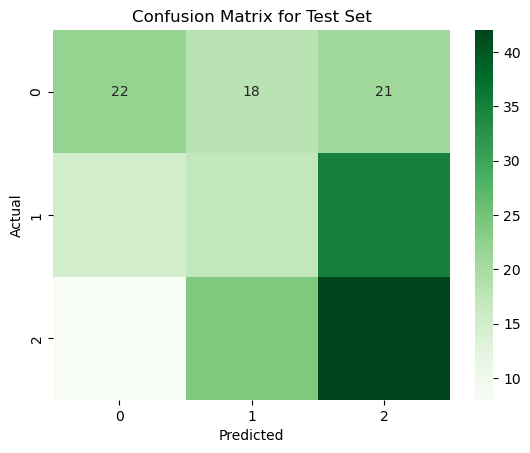

In [31]:
def svm_classifier(X_train, Y_train, X_test, Y_test):

    # Initialize the SVM model with a linear kernel
    svm_model = SVC(kernel='linear')  # You can adjust the kernel type (e.g., 'rbf', 'poly')

    # Train the model on the training data
    svm_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = svm_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = svm_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
svm_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 100.00%
Test Accuracy: 39.11%


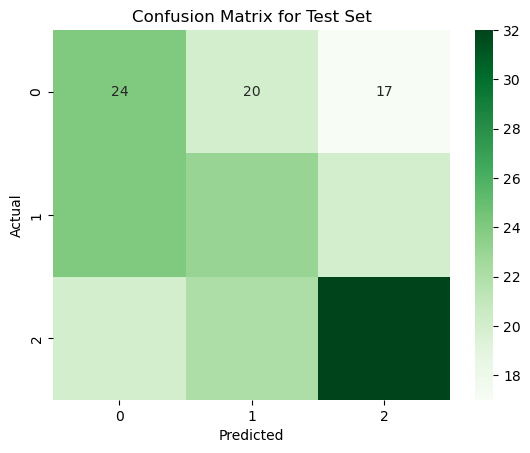

In [32]:
def decision_tree_classifier(X_train, Y_train, X_test, Y_test):
    """
    Function to train and evaluate a Decision Tree model on the given data.

    Parameters:
    X_train: Training features
    Y_train: Training labels
    X_test: Test features
    Y_test: Test labels
    """

    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier()  # You can adjust parameters like max_depth, criterion, etc.

    # Train the model on the training data
    dt_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = dt_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = dt_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
decision_tree_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 100.00%
Test Accuracy: 37.62%


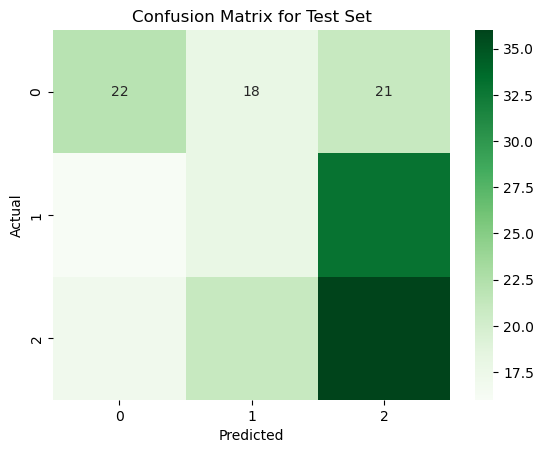

In [33]:
def random_forest_classifier(X_train, Y_train, X_test, Y_test):

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier()  # You can adjust parameters like n_estimators, max_depth, etc.

    # Train the model on the training data
    rf_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = rf_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = rf_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
random_forest_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 99.50%
Test Accuracy: 40.59%


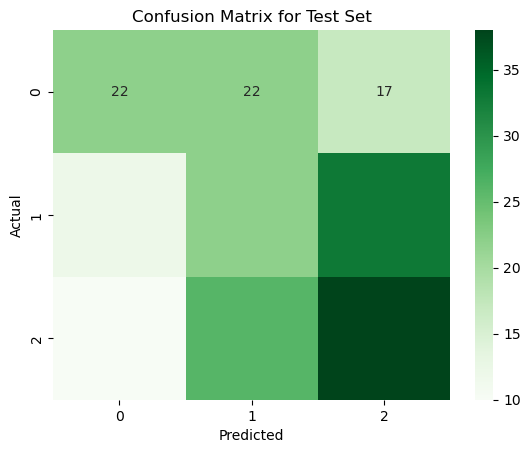

In [34]:
def catboost_classifier(X_train, Y_train, X_test, Y_test):


    # Initialize the CatBoost model
    catboost_model = CatBoostClassifier(silent=True)

    # Train the model on the training data
    catboost_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = catboost_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = catboost_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
catboost_classifier(X_train, Y_train, X_test, Y_test)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 62.66%
Test Accuracy: 39.11%


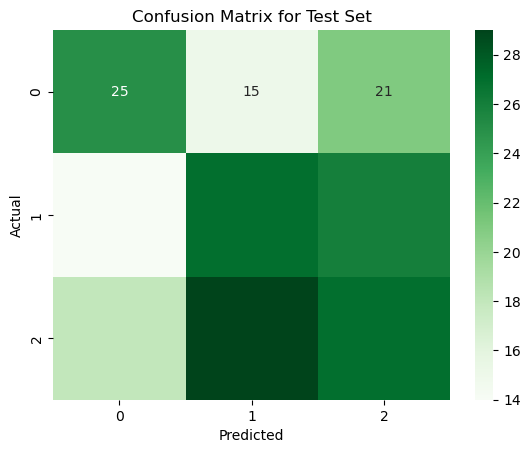

In [35]:
def adaboost_classifier(X_train, Y_train, X_test, Y_test):


    # Initialize the base model (Decision Tree)
    base_model = DecisionTreeClassifier(max_depth=1)  # Using a Decision Stump as the base learner

    # Initialize the AdaBoost model
    ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50)  # Use 'estimator' instead of 'base_estimator'

    # Train the model on the training data
    ada_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = ada_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = ada_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
adaboost_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 100.00%
Test Accuracy: 42.08%


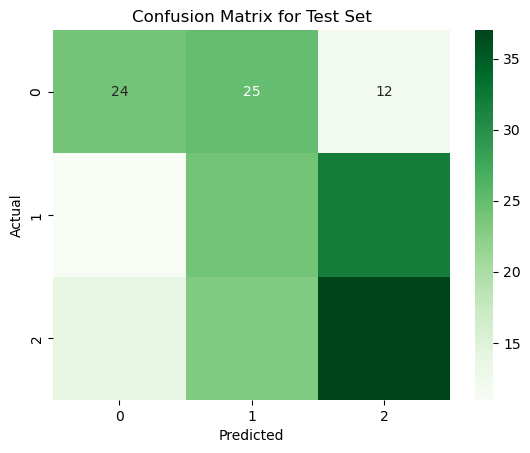

In [36]:
def xgboost_classifier(X_train, Y_train, X_test, Y_test):
    """
    Function to train and evaluate an XGBoost model on the given data.

    Parameters:
    X_train: Training features
    Y_train: Training labels
    X_test: Test features
    Y_test: Test labels
    """

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  # You can adjust parameters like n_estimators, max_depth, etc.

    # Train the model on the training data
    xgb_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = xgb_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = xgb_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
xgboost_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 71.59%
Test Accuracy: 34.65%


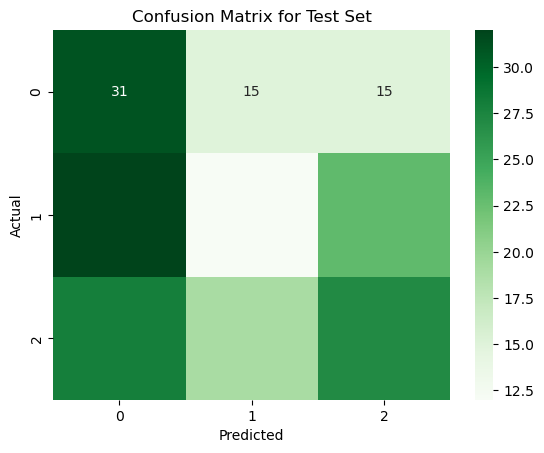

In [37]:
def naive_bayes_classifier(X_train, Y_train, X_test, Y_test):


    # Convert sparse matrices to dense if needed
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Initialize the Naive Bayes model
    nb_model = GaussianNB()  # You can use different variants like MultinomialNB or BernoulliNB as needed

    # Train the model on the training data
    nb_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = nb_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = nb_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
naive_bayes_classifier(X_train, Y_train, X_test, Y_test)